Naive Bayes Train Accuracy: 85.04%
Naive Bayes Test Accuracy: 83.70%
Top 10 Most Discriminative Words:


,Word,Discriminative Score
0,graphics,4.997143
1,religion,4.678879
2,atheism,4.609084
3,religious,4.452923
4,atheists,4.438738
5,moral,4.364630
6,bible,4.333378
7,islam,4.215595
8,morality,4.160535
9,livesey,4.122069


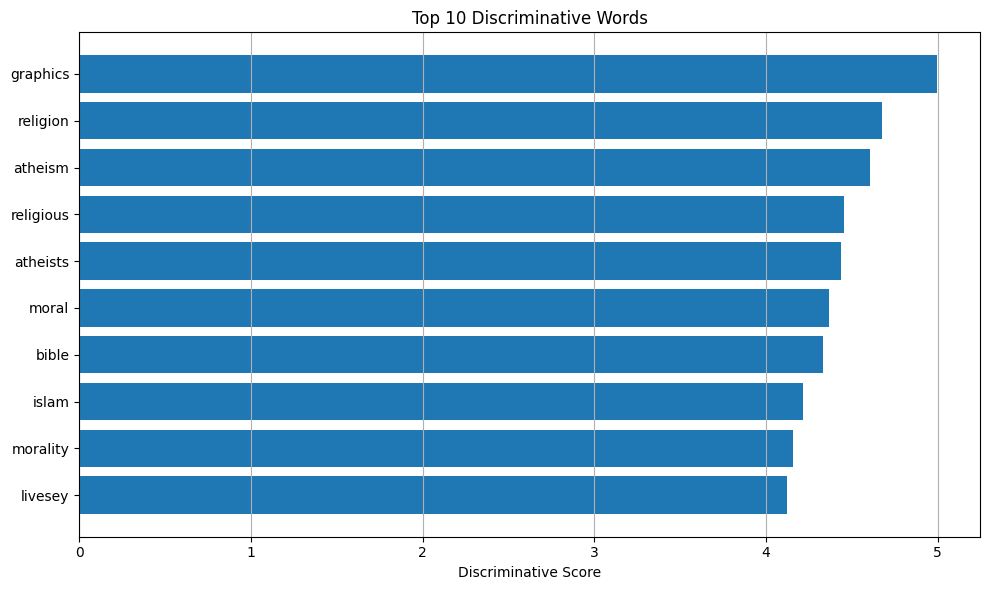

In [14]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

#dataset loading
labels = np.loadtxt(r"C:\Users\hafsa\OneDrive\Desktop\matlab\train.label", dtype=int)
labels = labels[:1061]  
rows, cols = [], []
with open(r"C:\Users\hafsa\OneDrive\Desktop\matlab\train.data") as f:
    for line in f:
        doc_id, word_id, count = map(int, line.split())
        if doc_id <= 1061:
            rows.append(doc_id - 1)  # zero-based doc index
            cols.append(word_id - 1) # zero-based word index

# binary matrix
data_vals = np.ones(len(rows), dtype=int)
X = csr_matrix((data_vals, (rows, cols)), shape=(1061, 61188)).toarray()

#naive bayes
gnb = GaussianNB()
gnb.fit(X, labels)
gnb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, gnb.predict(X_train))
test_accuracy = accuracy_score(y_test, gnb.predict(X_test))
print(f"Naive Bayes Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Naive Bayes Test Accuracy: {test_accuracy * 100:.2f}%")
# laplace smoothing
prob_class1 = (X[labels == 1].sum(axis=0) + 1) / ((labels == 1).sum() + 2)
prob_class2 = (X[labels == 2].sum(axis=0) + 1) / ((labels == 2).sum() + 2)

log_diff = np.abs(np.log(prob_class1) - np.log(prob_class2))
with open(r"C:\Users\hafsa\OneDrive\Desktop\matlab\vocab.txt") as f:
    vocab = [line.strip() for line in f.readlines()]


# identifying word indicies 
top_indices = np.argsort(log_diff)[-10:][::-1]  # top 10

top_words = [(vocab[i], log_diff[i]) for i in top_indices]
top_df = pd.DataFrame(top_words, columns=['Word', 'Discriminative Score'])
print("Top 10 Most Discriminative Words:")
display(top_df)

plt.figure(figsize=(10, 6))
plt.barh([w[0] for w in top_words[::-1]], [w[1] for w in top_words[::-1]])
plt.xlabel('Discriminative Score')
plt.title('Top 10 Discriminative Words')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


SVC with linear kernel: Train Acc = 0.9420, Test Acc = 0.9248
SVC with polynomial (degree 3) kernel: Train Acc = 0.7089, Test Acc = 0.7147


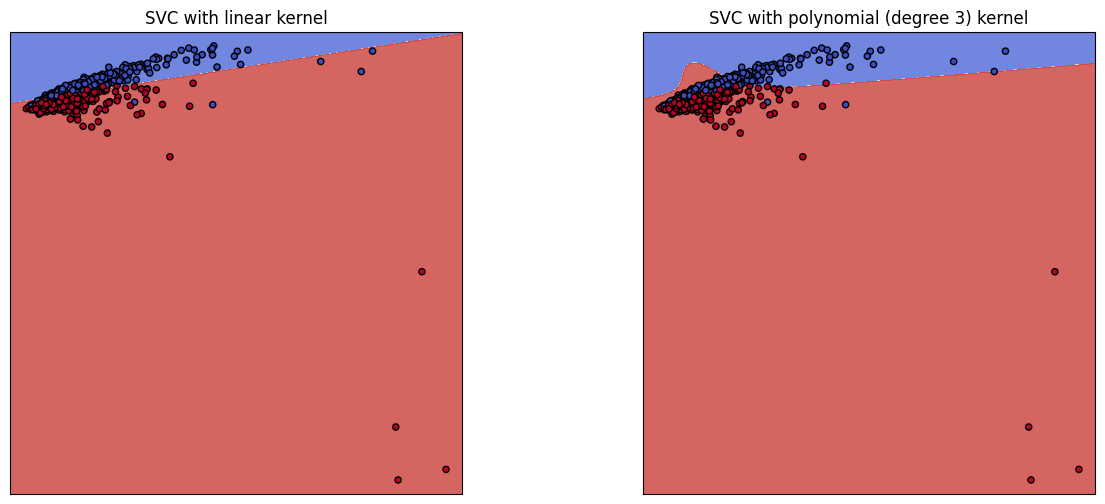

In [15]:
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

y = np.loadtxt(r"C:\Users\hafsa\OneDrive\Desktop\matlab\train.label", dtype=int)[:1061]
rows, cols = [], []
with open(r"C:\Users\hafsa\OneDrive\Desktop\matlab\train.data") as f:
    for line in f:
        doc_id, word_id, count = map(int, line.split())
        if doc_id <= 1061:
            rows.append(doc_id - 1)
            cols.append(word_id - 1)
data_vals = np.ones(len(rows), dtype=int)
from scipy.sparse import csr_matrix
X = csr_matrix((data_vals, (rows, cols)), shape=(1061, 61188)).toarray()

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.3, random_state=42)

# === Meshgrid and Plot Helpers ===
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
kernels = ['linear', 'poly']
titles = ['SVC with linear kernel', 'SVC with polynomial (degree 3) kernel']

for clf, title, ax in zip([SVC(kernel='linear'), SVC(kernel='poly', degree=3)], titles, sub):
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{title}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()